In [1]:
%matplotlib inline
import numpy as np

/usr/local/lib/python2.7/dist-packages/PIL/Image.py:84: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [2]:
import matplotlib.pyplot as plt

In [3]:
import katarchive

import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [4]:
def findproj(text):
    found='Unknown'        # default
    chx=text.find('prop')
    if chx >0  :
        pr2=text[chx+11:chx+38].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        if text.find('maser') >0:
            found="Maser monitoring"
            #print text
    return found

In [5]:
today=datetime.datetime.today()
ago=datetime.timedelta(-1)
last=today+ago
print today,last
begin=last.strftime(format="%d/%m/%Y")
end=today.strftime(format="%d/%m/%Y")

2016-06-20 12:10:28.985339 2016-06-19 12:10:28.985339


In [6]:
print katarchive.search_archive(startdate=begin,enddate=end)


Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-06-18T22:00:00Z TO 2016-06-20T21:59:59Z]
Returning 4 results
[['1', '2016-06-19 04:00:21 SAST', 'Nadeem', [874181229]], ['1', '2016-06-19 03:56:12 SAST', 'operator', [60809951]], ['1', '2016-06-19 03:15:14 SAST', 'Lindsay', [1031900349]], ['1', '2016-06-19 03:11:17 SAST', 'operator', [85998440]]]


In [7]:
f = katarchive.search_archive(startdate=begin)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-06-18T22:00:00Z TO 2016-06-20T21:59:59Z]
Returning 4 results


In [8]:
#print 'First file in run: ' , start.isoformat()
#print 'Last file in run: ' , end.isoformat()

In [9]:
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    print fi.metadata.ExperimentID, p, fi.metadata.Duration, fi.metadata.Description, len(fi.metadata.Antennas)


2 20150210SS-01 14640.2 Field11Feb_High 5
2 COMM_Atten 107.01 Auto atten 5
2 COMM_Point_LM 1842.15 Pointing Observation 5
2 COMM_Atten 152.01 Auto atten 5


Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [10]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    if p == "Unknown":
        p="Maser Monitoring"
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [11]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  inf %


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


In [12]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

20150210SS-01 4.07


In [13]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

20150210SS-01      4.1 5


Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

In [14]:
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 7))

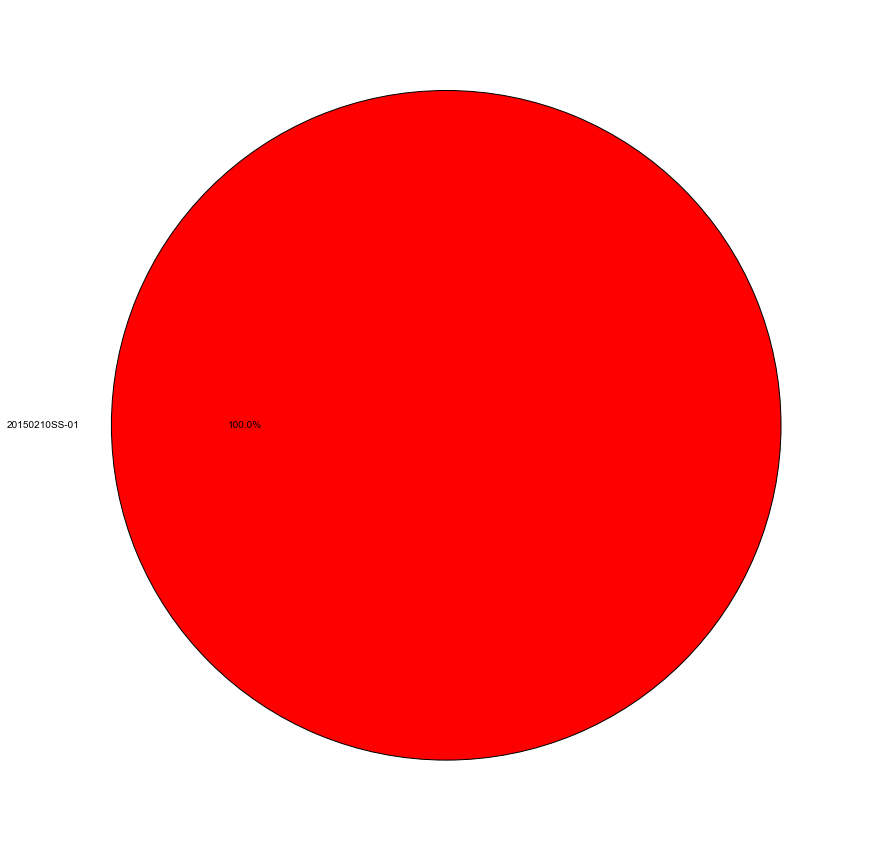

In [15]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,colors=colors,autopct='%1.1f%%');

In [16]:
plt.show()

In [17]:
fi.metadata.InstructionSet

u'/home/kat/scripts/observation/auto_attenuate.py -f 1822 -t radec,0,-90 --mode=bc16n400M1k --proposal-id COMM_Atten program-block-id=00ob1000000 --sb-id-code=20160617-0019 --description= AutoAttenuation for 00ob1000000  --observer=operator --config-label=Auto2016-03-01T11h45m26.0Z'